# Diabetes Health Indicators Dataset


---

### A Comprehensive Dataset of 100,000 Patient Records for Diabetes Risk Analysis

#### Overview
This dataset contains 100,000 patient records designed for diabetes risk prediction, analysis, and machine learning applications. The dataset is clean, preprocessed, and ready for use in classification, regression, feature engineering, statistical analysis, and data visualization.

#### Link: https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset/data

### Author: Rakesh Kolipaka & Ranjith Kumar Digutla

#### License
#### CC0: Public Domain

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [19]:
data = pd.read_csv('../source_data/diabetes_dataset.csv')
data

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,46,Male,Other,Graduate,Upper-Middle,Unemployed,Former,1,136,8.3,...,45,150,116,113,109,14.58,5.55,26.0,Pre-Diabetes,0
99996,41,Female,White,Graduate,Middle,Employed,Never,3,76,8.8,...,55,123,146,96,146,9.02,5.97,24.4,Pre-Diabetes,0
99997,57,Female,Black,No formal,Upper-Middle,Employed,Former,4,121,9.9,...,50,111,184,93,132,2.57,5.21,27.6,No Diabetes,0
99998,47,Female,Black,Highschool,Lower-Middle,Retired,Never,3,52,5.9,...,68,91,116,106,117,9.81,5.53,26.4,Pre-Diabetes,0


Overview of the overall data structure. How many records (observations) there are and how many features. 

Checking the data types of the features in the dataset.


---

In [20]:
data.shape

(100000, 31)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

Examine the categorical features to understand the distribution of the data.

---

In [22]:
categorical_features = ['gender', 'ethnicity', 'education_level', 'income_level', 'employment_status', 
                        'smoking_status', 'alcohol_consumption_per_week', 'diabetes_stage', 'family_history_diabetes',
                        'hypertension_history', 'cardiovascular_history']

In [23]:
def feature_distribution(dataset, features, cols=3):
    rows = (len(features) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.countplot(x=feature, hue=feature, data=dataset, ax=axes[i])
        axes[i].set_title(f'{feature} distribution')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

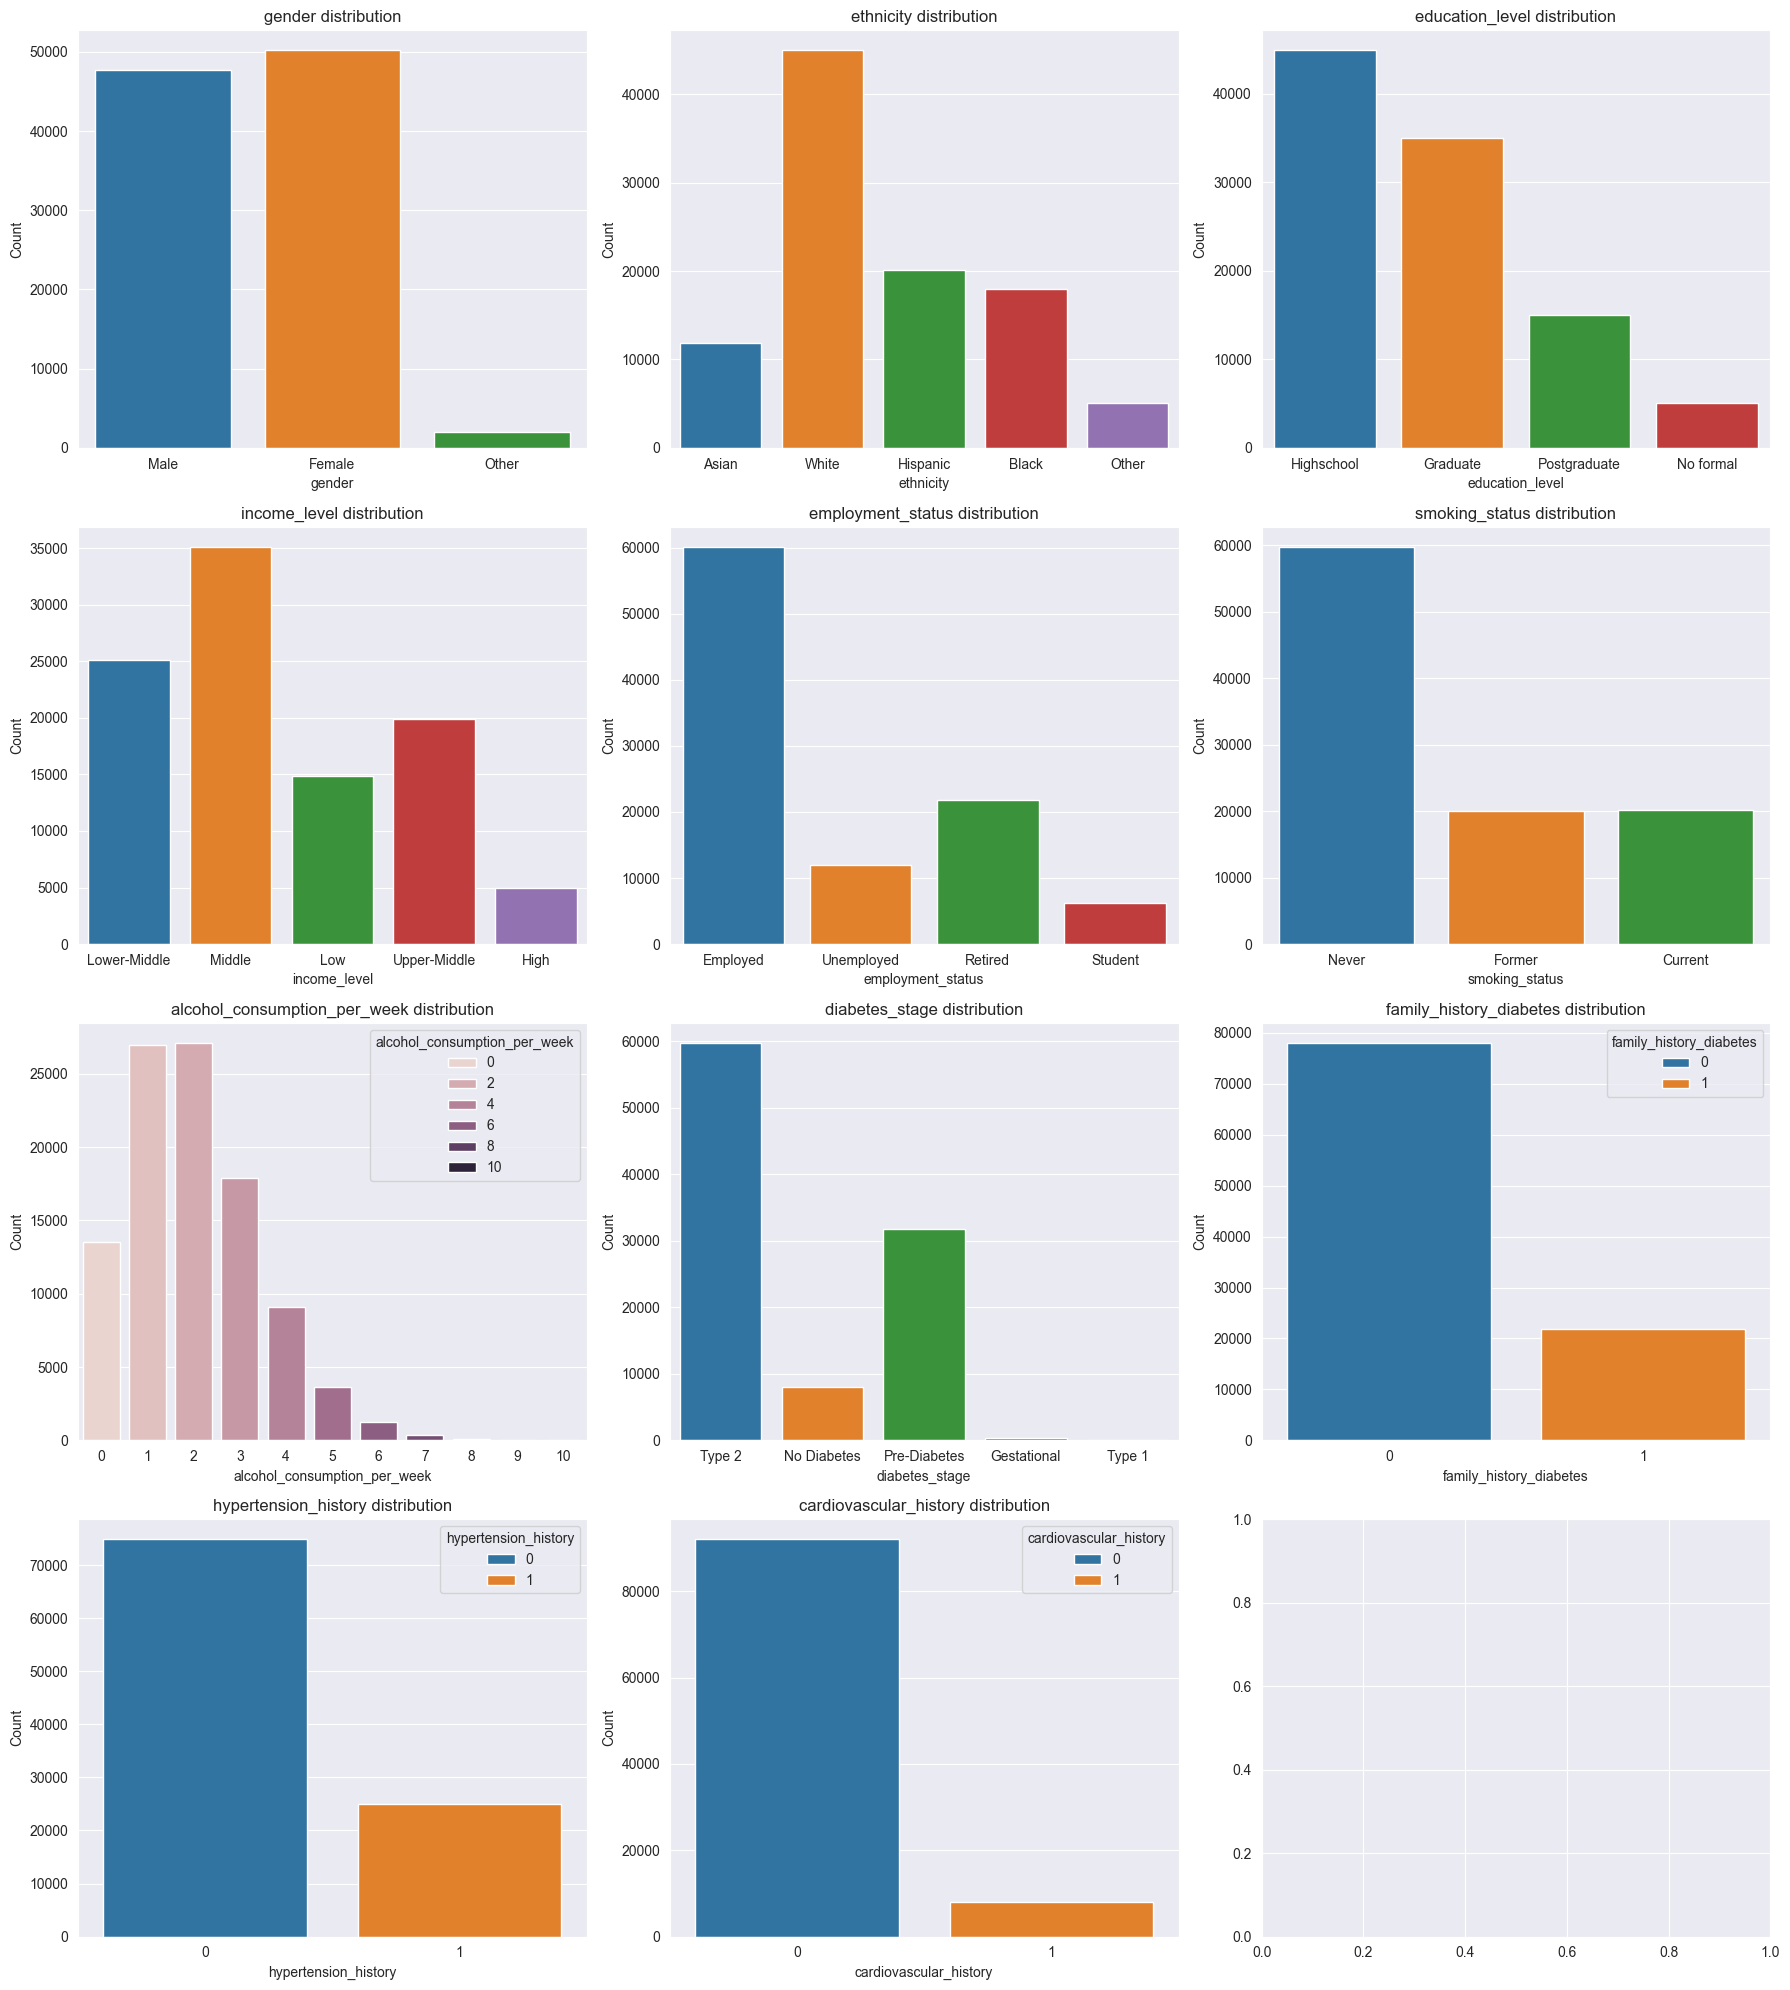

In [24]:
feature_distribution(data, categorical_features, cols=3)

Using .describe() to get a quick statistical overview of the numerical features.

This helps identify potential anomalies, outliers, data quality issues and gives

an initial understanding of how the values are distributed across the dataset.

---

In [28]:
numerical_features = data[
    [   'age',
        'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day',
        'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio',
        'systolic_bp', 'diastolic_bp', 'heart_rate',
        'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
        'triglycerides', 'glucose_fasting', 'glucose_postprandial',
        'insulin_level', 'hba1c', 'diabetes_risk_score'
    ]
]

In [29]:
numerical_features.describe()

,age,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.12041,118.911640,5.994787,6.997818,5.996468,25.612653,0.856078,115.799610,75.23249,69.632870,185.978110,54.042790,103.000430,121.462650,111.11712,160.035050,9.061242,6.520776,30.222362
std,15.60460,84.409662,1.780954,1.094622,2.468406,3.586705,0.046837,14.284073,8.20425,8.371954,32.013005,10.267374,33.390256,43.372619,13.59561,30.935472,4.954060,0.813921,9.061505
min,18.00000,0.000000,0.000000,3.000000,0.500000,15.000000,0.670000,90.000000,50.00000,40.000000,100.000000,20.000000,50.000000,30.000000,60.00000,70.000000,2.000000,4.000000,2.700000
25%,39.00000,57.000000,4.800000,6.300000,4.300000,23.200000,0.820000,106.000000,70.00000,64.000000,164.000000,47.000000,78.000000,91.000000,102.00000,139.000000,5.090000,5.970000,23.800000
50%,50.00000,100.000000,6.000000,7.000000,6.000000,25.600000,0.860000,116.000000,75.00000,70.000000,186.000000,54.000000,102.000000,121.000000,111.00000,160.000000,8.790000,6.520000,29.000000
75%,61.00000,160.000000,7.200000,7.700000,7.700000,28.000000,0.890000,125.000000,81.00000,75.000000,208.000000,61.000000,126.000000,151.000000,120.00000,181.000000,12.450000,7.070000,35.600000
max,90.00000,833.000000,10.000000,10.000000,16.800000,39.200000,1.060000,179.000000,110.00000,105.000000,318.000000,98.000000,263.000000,344.000000,172.00000,287.000000,32.220000,9.800000,67.200000
